# Analysis by Contents

In [1]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
okt = Okt()
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

### 1. 전체 데이터

In [3]:
every = pd.read_csv('./real_results/concat_everything_deaf.csv')

In [4]:
every = every.drop(['Unnamed: 0'], axis=1)
every = every.drop(['Unnamed: 0.1'], axis=1)
every

,question_num,modality,answer,answer_input,submit_time,elapse_time
0,1,"""감정""","[""슬픈"", ""우울한"", ""화난""]",NaN,2021-11-12 10:03:46,46232
1,2,"""감정""","{""strength"": 8, ""positive"": 2, ""activity"": 5}",NaN,2021-11-12 10:04:23,15695
2,3,"""감정""","[""기쁜"", ""감동적인""]",NaN,2021-11-12 10:04:38,12436
3,4,"""감정""","{""strength"": 9, ""positive"": 8, ""activity"": 8}",NaN,2021-11-12 10:04:45,6695
4,5,"""감정""","[""걱정되는"", ""무서운"", ""짜증나는"", ""불안한"", ""경계되는"", ""지루한""]",NaN,2021-11-12 10:05:00,13765
...,...,...,...,...,...,...
1237,116,"""댄스""","{""strength"": 7, ""positive"": 7, ""activity"": 5}",NaN,2021-11-12 16:23:23,12979
1238,117,"""댄스""","[""즐거운"", ""쾌활한"", ""평화로운"", ""강인한"", ""감동적인"", ""기대되는""]",NaN,2021-11-12 16:23:52,26760
1239,118,"""댄스""","{""strength"": 8, ""positive"": 8, ""activity"": 10}",NaN,2021-11-12 16:24:01,5821
1240,119,"""댄스""","[""기쁜"", ""아름다운"", ""믿음직한"", ""감동적인""]",NaN,2021-11-12 16:24:31,28079


### 2. 댄스 데이터

In [5]:
dance_df = every[every['modality'] == '"댄스"']
dance_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
83,81,"""댄스""","[""아무런 감정이 들지 않는다""]",NaN,2021-11-12 10:53:01,12124
84,82,"""댄스""",NaN,NaN,2021-11-12 10:53:03,585
85,83,"""댄스""","[""쾌활한""]",NaN,2021-11-12 10:53:12,8463
86,84,"""댄스""","{""strength"": 7, ""positive"": 6, ""activity"": 6}",NaN,2021-11-12 10:53:17,4135
87,85,"""댄스""","[""쾌활한""]",NaN,2021-11-12 10:53:30,11933
...,...,...,...,...,...,...
1237,116,"""댄스""","{""strength"": 7, ""positive"": 7, ""activity"": 5}",NaN,2021-11-12 16:23:23,12979
1238,117,"""댄스""","[""즐거운"", ""쾌활한"", ""평화로운"", ""강인한"", ""감동적인"", ""기대되는""]",NaN,2021-11-12 16:23:52,26760
1239,118,"""댄스""","{""strength"": 8, ""positive"": 8, ""activity"": 10}",NaN,2021-11-12 16:24:01,5821
1240,119,"""댄스""","[""기쁜"", ""아름다운"", ""믿음직한"", ""감동적인""]",NaN,2021-11-12 16:24:31,28079


### 3. 시각적 데이터

In [6]:
visual_df = every[every['modality'].isin(['"감정"', '"영화"', '"뮤직비디오"', '"시각화"'])]
visual_df

,question_num,modality,answer,answer_input,submit_time,elapse_time
0,1,"""감정""","[""슬픈"", ""우울한"", ""화난""]",NaN,2021-11-12 10:03:46,46232
1,2,"""감정""","{""strength"": 8, ""positive"": 2, ""activity"": 5}",NaN,2021-11-12 10:04:23,15695
2,3,"""감정""","[""기쁜"", ""감동적인""]",NaN,2021-11-12 10:04:38,12436
3,4,"""감정""","{""strength"": 9, ""positive"": 8, ""activity"": 8}",NaN,2021-11-12 10:04:45,6695
4,5,"""감정""","[""걱정되는"", ""무서운"", ""짜증나는"", ""불안한"", ""경계되는"", ""지루한""]",NaN,2021-11-12 10:05:00,13765
...,...,...,...,...,...,...
1197,76,"""시각화""",NaN,NaN,2021-11-12 16:07:41,4099
1198,77,"""시각화""","[""아무런 감정이 들지 않는다""]",NaN,2021-11-12 16:07:51,8272
1199,78,"""시각화""",NaN,NaN,2021-11-12 16:07:56,1942
1200,79,"""시각화""","[""지루한""]",NaN,2021-11-12 16:08:21,20867


## 농인 감정 단어 차원 만들기

In [7]:
from ast import literal_eval

In [8]:
# 데이터 먼저 전처리하기! (answer가 결측치인 행의 값 세트행은 삭제한다)
nan_every = every[every.isnull()['answer'] == True]

In [9]:
nan_lst = list(nan_every.index)

In [10]:
index_lst = []
for i in range(len(nan_lst)):
    if nan_lst[i] % 2 == 0:
        index_lst.append(nan_lst[i])
        index_lst.append(nan_lst[i]+1)
    else:
        index_lst.append(nan_lst[i])
        index_lst.append(nan_lst[i]-1)

index_lst = set(index_lst)
index_lst = list(index_lst)
print(index_lst)

[522, 523, 532, 533, 1062, 1063, 1074, 1075, 1080, 1081, 574, 575, 64, 65, 576, 577, 72, 73, 76, 77, 78, 79, 80, 81, 84, 85, 90, 91, 92, 93, 94, 95, 100, 101, 102, 103, 104, 105, 106, 107, 1146, 1147, 636, 637, 1156, 1157, 1166, 1167, 1170, 1171, 1174, 1175, 668, 669, 158, 159, 672, 673, 1186, 1187, 164, 165, 676, 677, 1194, 1195, 1196, 1197, 1198, 1199, 198, 199, 714, 715, 202, 203, 226, 227, 228, 229, 232, 233, 316, 317, 844, 332, 333, 845, 930, 931, 430, 431, 942, 943, 966, 967, 976, 977, 980, 981, 482, 483]


In [11]:
every = every.drop(index=index_lst, axis=0) #?????
every

,question_num,modality,answer,answer_input,submit_time,elapse_time
0,1,"""감정""","[""슬픈"", ""우울한"", ""화난""]",NaN,2021-11-12 10:03:46,46232
1,2,"""감정""","{""strength"": 8, ""positive"": 2, ""activity"": 5}",NaN,2021-11-12 10:04:23,15695
2,3,"""감정""","[""기쁜"", ""감동적인""]",NaN,2021-11-12 10:04:38,12436
3,4,"""감정""","{""strength"": 9, ""positive"": 8, ""activity"": 8}",NaN,2021-11-12 10:04:45,6695
4,5,"""감정""","[""걱정되는"", ""무서운"", ""짜증나는"", ""불안한"", ""경계되는"", ""지루한""]",NaN,2021-11-12 10:05:00,13765
...,...,...,...,...,...,...
1237,116,"""댄스""","{""strength"": 7, ""positive"": 7, ""activity"": 5}",NaN,2021-11-12 16:23:23,12979
1238,117,"""댄스""","[""즐거운"", ""쾌활한"", ""평화로운"", ""강인한"", ""감동적인"", ""기대되는""]",NaN,2021-11-12 16:23:52,26760
1239,118,"""댄스""","{""strength"": 8, ""positive"": 8, ""activity"": 10}",NaN,2021-11-12 16:24:01,5821
1240,119,"""댄스""","[""기쁜"", ""아름다운"", ""믿음직한"", ""감동적인""]",NaN,2021-11-12 16:24:31,28079


In [12]:
def make_string(df):
    lst = []
    for i in range(0, len(df), 2):
        try:
            string = ''
            if df['question_num'][i] % 2 != 0:
                string += df['answer'][i] + ', ' + df['answer'][i+1]
                lst.append(string)
        except:
            pass

    return lst

In [13]:
annotated_data = make_string(every)
annotated_data

['["슬픈", "우울한", "화난"], {"strength": 8, "positive": 2, "activity": 5}',
 '["기쁜", "감동적인"], {"strength": 9, "positive": 8, "activity": 8}',
 '["걱정되는", "무서운", "짜증나는", "불안한", "경계되는", "지루한"], {"strength": 8, "positive": 3, "activity": 1}',
 '["경계되는", "혐오스러운", "짜증나는", "화난"], {"strength": 8, "positive": 1, "activity": 1}',
 '["기대되는", "믿음직한", "감동적인"], {"strength": 8, "positive": 7, "activity": 3}',
 '["놀란"], {"strength": 9, "positive": 3, "activity": 5}',
 '["기대되는"], {"strength": 9, "positive": 8, "activity": 2}',
 '["싫은", "짜증나는", "지루한"], {"strength": 9, "positive": 3, "activity": 3}',
 '["즐거운", "기대되는"], {"strength": 10, "positive": 9, "activity": 10}',
 '["걱정되는", "무서운", "경계되는"], {"strength": 10, "positive": 2, "activity": 5}',
 '["욕망의", "기대되는"], ["욕망의", "기대되는", "걱정되는"]',
 '["슬픈", "우울한"], {"strength": 10, "positive": 1, "activity": 7}',
 '["즐거운", "기쁜", "쾌활한", "기대되는"], {"strength": 8, "positive": 9, "activity": 10}',
 '["경계되는", "싫은", "불안한"], {"strength": 7, "positive": 3, "activity": 3}',
 '["무서

In [14]:
emotion_dict = {"즐거운": [0, 0, 0], "기쁜": [0, 0, 0], "쾌활한": [0, 0, 0], "욕망의": [0, 0, 0], "아름다운": [0, 0, 0], "차분한": [0, 0, 0], "평화로운": [0, 0, 0], "강인한": [0, 0, 0], "감동적인": [0, 0, 0],
               "믿음직한": [0, 0, 0], "기대되는": [0, 0, 0], "불안한": [0, 0, 0], "걱정되는": [0, 0, 0], "무서운": [0, 0, 0], "싫은": [0, 0, 0], "짜증나는": [0, 0, 0], "화난": [0, 0, 0], "경계되는": [0, 0, 0],
               "반항적인": [0, 0, 0], "지루한": [0, 0, 0], "슬픈": [0, 0, 0], "우울한": [0, 0, 0], "혐오스러운": [0, 0, 0], "놀란": [0, 0, 0], "아무런 감정이 들지 않는다": [0, 0, 0]}

In [15]:
# 각 차원의 emotion 딕셔너리에 값을 더해주는 함수
def make_dimension_dict(emotion_dict, annotated_data):
    for key, value in emotion_dict.items():
        for j in range(len(annotated_data)):
            annotated_dict = literal_eval(annotated_data[j])
#             print(annotated_dict[1])
            try:
                if key in annotated_dict[0]:
                    emotion_dict[key][0] += annotated_dict[1]['strength']
                    emotion_dict[key][1] += annotated_dict[1]['positive']
                    emotion_dict[key][2] += annotated_dict[1]['activity']
            except:
                pass
            
    return emotion_dict

In [16]:
dimension_dict = make_dimension_dict(emotion_dict, annotated_data)
dimension_dict

{'즐거운': [162, 170, 153],
 '기쁜': [106, 107, 89],
 '쾌활한': [145, 152, 157],
 '욕망의': [112, 98, 101],
 '아름다운': [93, 96, 68],
 '차분한': [71, 70, 25],
 '평화로운': [36, 39, 27],
 '강인한': [53, 43, 49],
 '감동적인': [45, 46, 27],
 '믿음직한': [22, 21, 13],
 '기대되는': [145, 149, 119],
 '불안한': [121, 31, 71],
 '걱정되는': [42, 11, 20],
 '무서운': [95, 30, 58],
 '싫은': [48, 19, 23],
 '짜증나는': [96, 31, 55],
 '화난': [107, 31, 64],
 '경계되는': [128, 44, 77],
 '반항적인': [167, 63, 116],
 '지루한': [105, 60, 53],
 '슬픈': [136, 30, 74],
 '우울한': [166, 54, 96],
 '혐오스러운': [42, 11, 32],
 '놀란': [82, 30, 61],
 '아무런 감정이 들지 않는다': [0, 0, 0]}

In [17]:
# -1 와 1 사이로 어노테이션된 값을 리스케일링해주는 함수
def normalizer(dimension_dict, emotion_dict):
    lst_a = []
    lst_b = []
    lst_c = []
    
    dimension_numbers = list(dimension_dict.values())
    
    for i in range(len(dimension_numbers)):
        for j in range(len(dimension_numbers[i])):
            lst_a.append(dimension_numbers[i][0])
            lst_b.append(dimension_numbers[i][1])
            lst_c.append(dimension_numbers[i][2])
            
            
    # A열의 최댓값과 최솟값 구하기       
    max_num_a = max(lst_a)
    min_num_a = min(lst_a)
    
    # B열의 최댓값과 최솟값 구하기       
    max_num_b = max(lst_b)
    min_num_b = min(lst_b)
    
    # C열의 최댓값과 최솟값 구하기       
    max_num_c = max(lst_c)
    min_num_c = min(lst_c)
    
    
    # A열, B열, C열의 rescaling 된 값 구하기
    for key, values in dimension_dict.items():
        dimension_dict[key][0] = ((dimension_dict[key][0] - min_num_a) / (max_num_a - min_num_a)) * 2 -1
        dimension_dict[key][1] = ((dimension_dict[key][1] - min_num_b) / (max_num_b - min_num_b)) * 2 -1
        dimension_dict[key][2] = ((dimension_dict[key][2] - min_num_c) / (max_num_c - min_num_c)) * 2 -1
        
        
    return dimension_dict

In [18]:
emotion = normalizer(dimension_dict, emotion_dict)
emotion

{'즐거운': [0.9401197604790419, 1.0, 0.9490445859872612],
 '기쁜': [0.2694610778443114, 0.2588235294117647, 0.13375796178343946],
 '쾌활한': [0.7365269461077844, 0.7882352941176471, 1.0],
 '욕망의': [0.341317365269461, 0.15294117647058814, 0.286624203821656],
 '아름다운': [0.11377245508982026, 0.12941176470588234, -0.13375796178343946],
 '차분한': [-0.14970059880239517, -0.17647058823529416, -0.6815286624203822],
 '평화로운': [-0.5688622754491017, -0.5411764705882354, -0.6560509554140128],
 '강인한': [-0.3652694610778443, -0.49411764705882355, -0.37579617834394907],
 '감동적인': [-0.4610778443113772, -0.45882352941176474, -0.6560509554140128],
 '믿음직한': [-0.7365269461077844, -0.7529411764705882, -0.8343949044585988],
 '기대되는': [0.7365269461077844, 0.7529411764705882, 0.515923566878981],
 '불안한': [0.4491017964071857, -0.6352941176470588, -0.09554140127388533],
 '걱정되는': [-0.4970059880239521, -0.8705882352941177, -0.7452229299363058],
 '무서운': [0.13772455089820368, -0.6470588235294117, -0.2611464968152867],
 '싫은': [-0.42

In [19]:
from mpl_toolkits.mplot3d import Axes3D

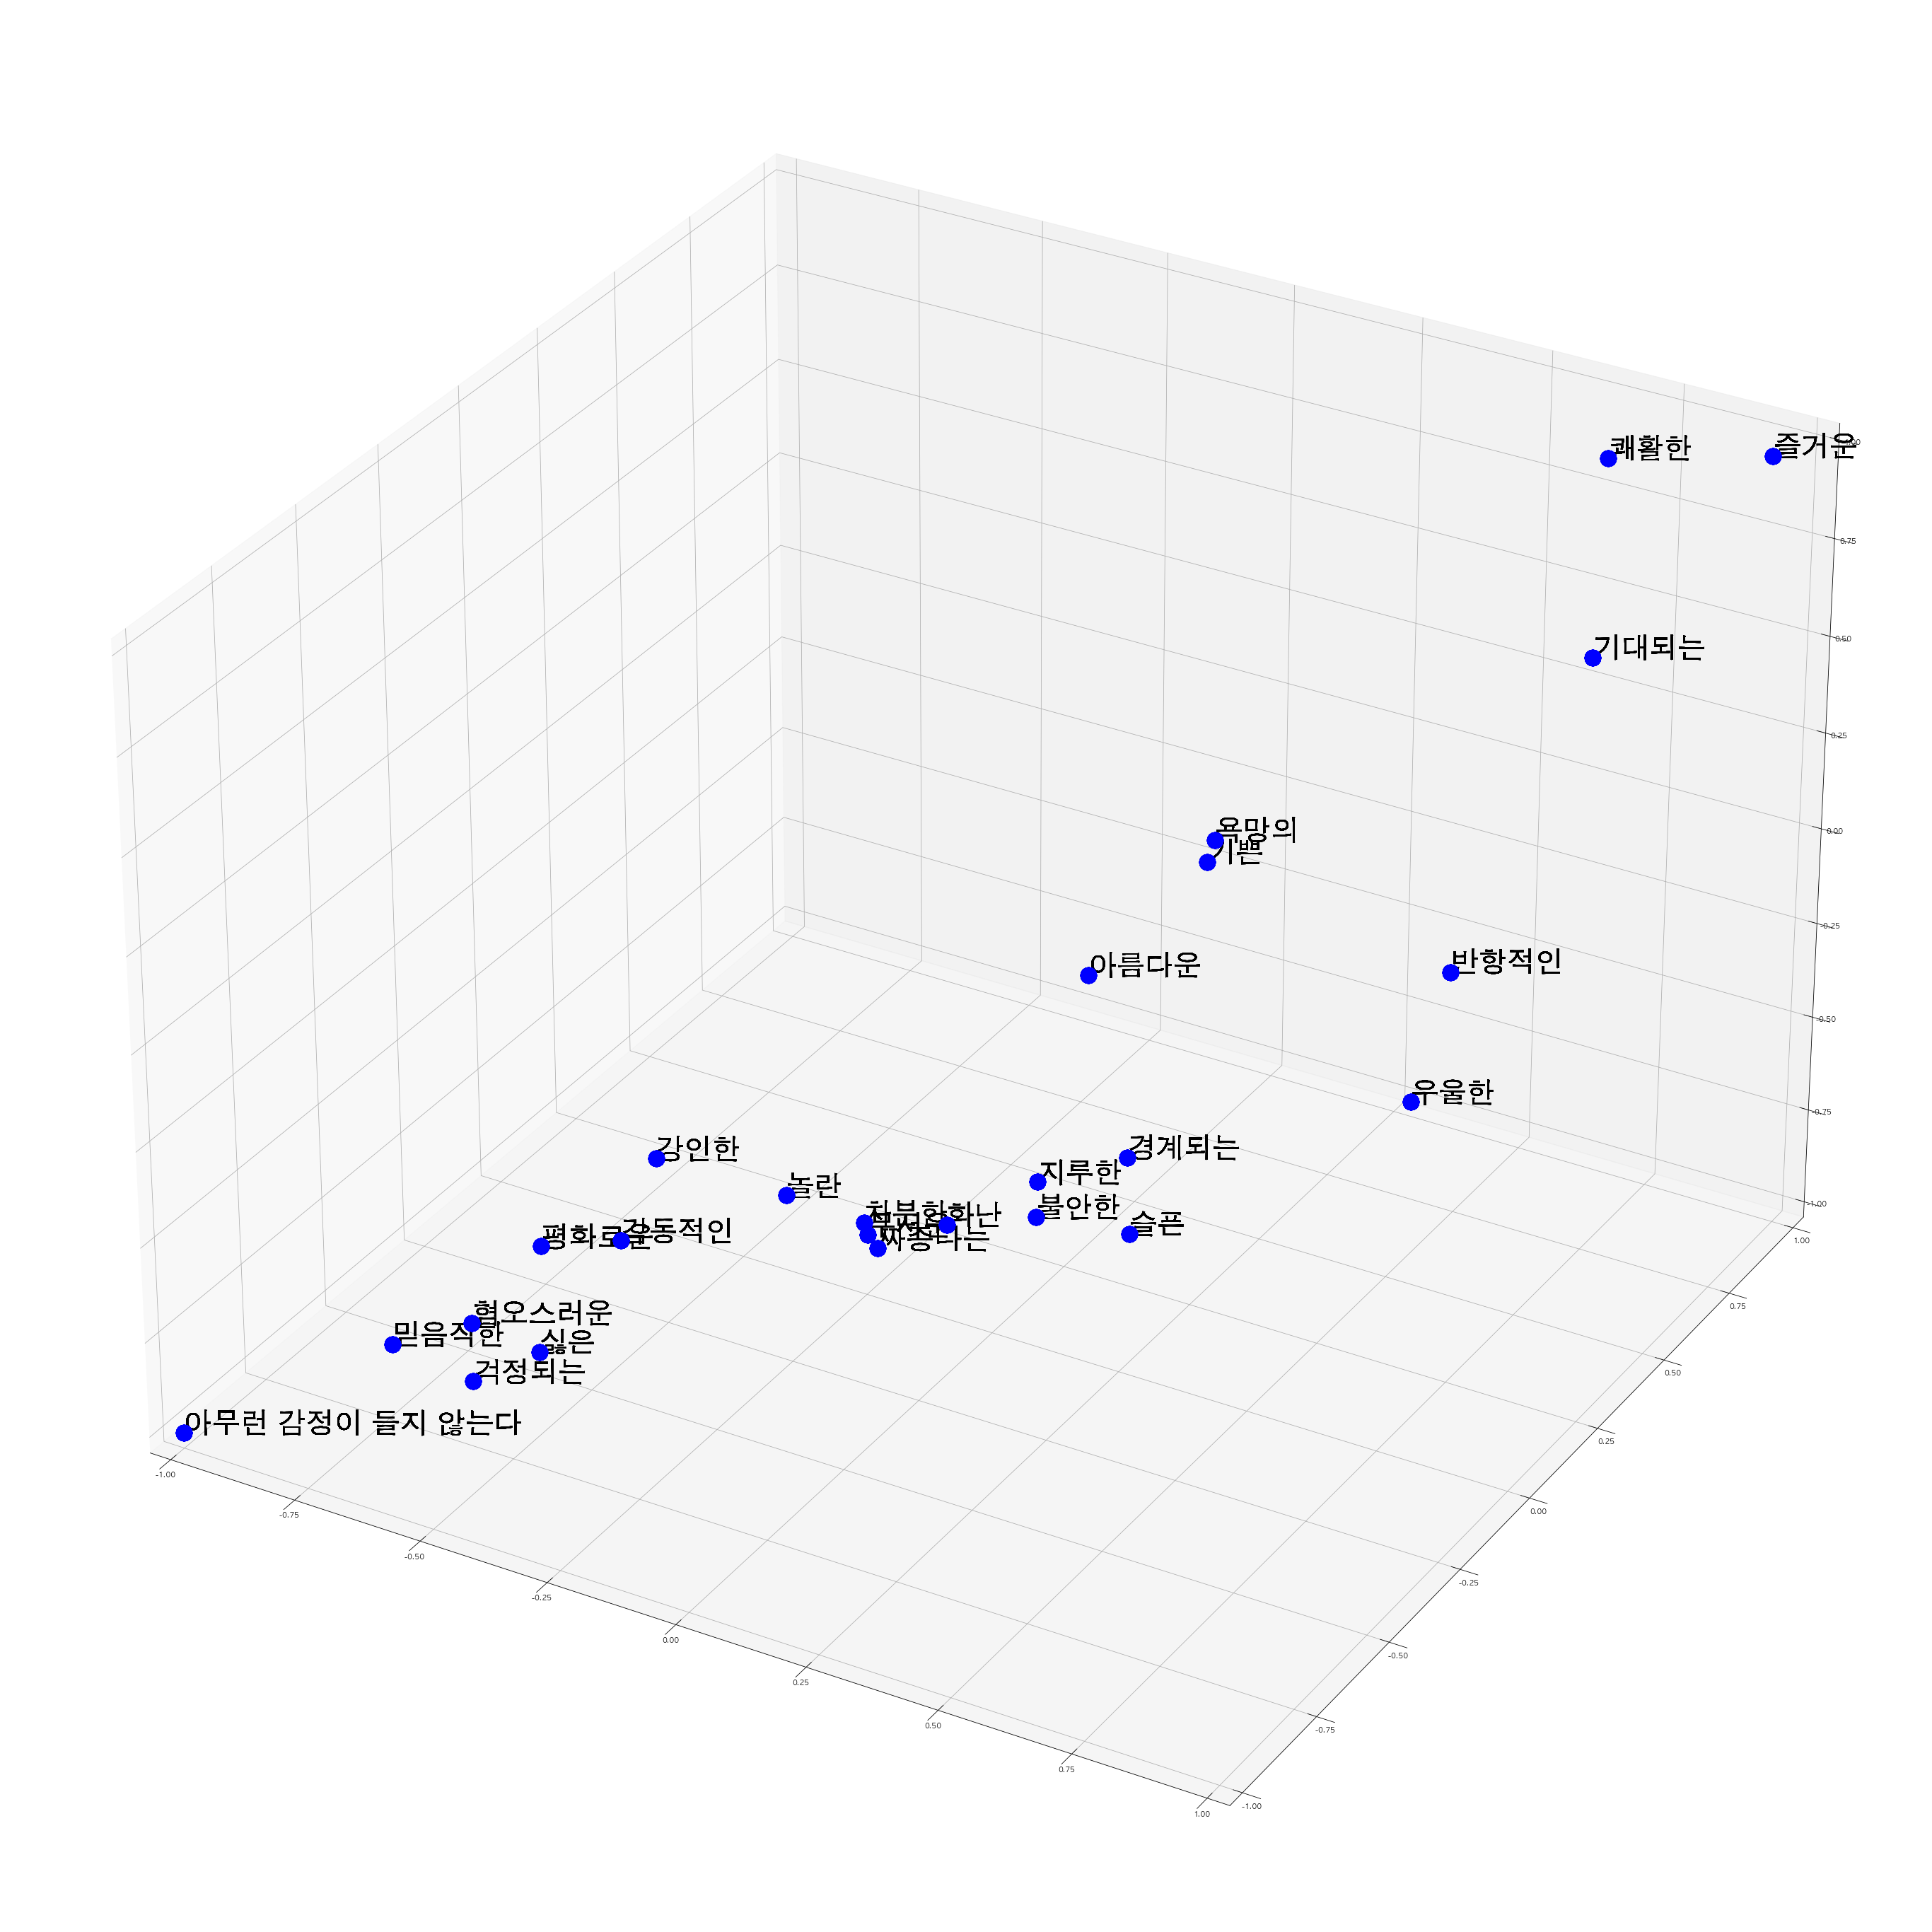

In [20]:
labels = list(emotion.keys())
fig = plt.figure(figsize=(50, 50))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

for idx, name in enumerate(labels):
    for key, values in emotion.items():
        ax.scatter(emotion[name][0], emotion[name][1], emotion[name][2], color='blue', s=500)
        ax.text(emotion[name][0], emotion[name][1], emotion[name][2], name, size=40)